### M5 Assignment: Please Complete The Following Task.

#### Total 20 Points.  
Based on Module 4 and Module 5, please complete the following tasks using Python. You can either fill out the Jupyter Notebook provided in Canvas (#M5 Assignment) or create your own notebook or Python script from scratch. If you use Google Colab, ensure you share the file with my email so I can grade your assignment. Each task is worth 5 points, and each subtask is worth 1 point, totaling 20 points.



(You can submit/upload the complete ipynb file in the canvas)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

#### Task A. Data Visualization: 4 points

1. Data Retrieval:
> - Download the data files “30_Industry_Portfolios.csv” and “F-F_Research_Data_Factors.csv” from the provided Google Drive link: https://drive.google.com/drive/folders/1PsqX15G5eGEY9kg2wAFNFrfgjwUlEYIl?usp=drive_link  . 
> - Ensure that you select data from January 01, 2000, to December 31, 2018.
    
    
2. Scatterplot Creation: Create a 2x2 scatterplot matrix that reflects the relationship between the following pairs:
> -  mkt-rf and food
> -  SMB and food
> -  mkt-rf and games
> -  SMB and games
            
            
3.  Observations:
> -  Describe the observed relationships from the scatterplot in words.
    



In [68]:
# Load the data files
factors_path = "F-F_Research_Data_Factors.csv"
industries_path = "30_Industry_Portfolios.csv"

# Read the data files
factors_df = pd.read_csv(factors_path, skiprows=3)  # Skipping initial description rows
industries_df = pd.read_csv(industries_path, skiprows=11)  # Skipping initial description rows

In [72]:
# Rename columns for better readability based on expected structure
factors_df.columns = ["Date", "Mkt-RF", "SMB", "HML", "RF"]
industries_df.columns = ["Date"] + [f"Industry_{i}" for i in range(1, 31)]

# Convert Date to datetime format
factors_df["Date"] = pd.to_datetime(factors_df["Date"], format='%Y%m')
industries_df["Date"] = pd.to_datetime(industries_df["Date"], format='%Y%m')

# Filter data from January 2000 to December 2018
start_date = "2000-01-01"
end_date = "2018-12-31"
factors_df = factors_df[(factors_df["Date"] >= start_date) & (factors_df["Date"] <= end_date)]
industries_df = industries_df[(industries_df["Date"] >= start_date) & (industries_df["Date"] <= end_date)]

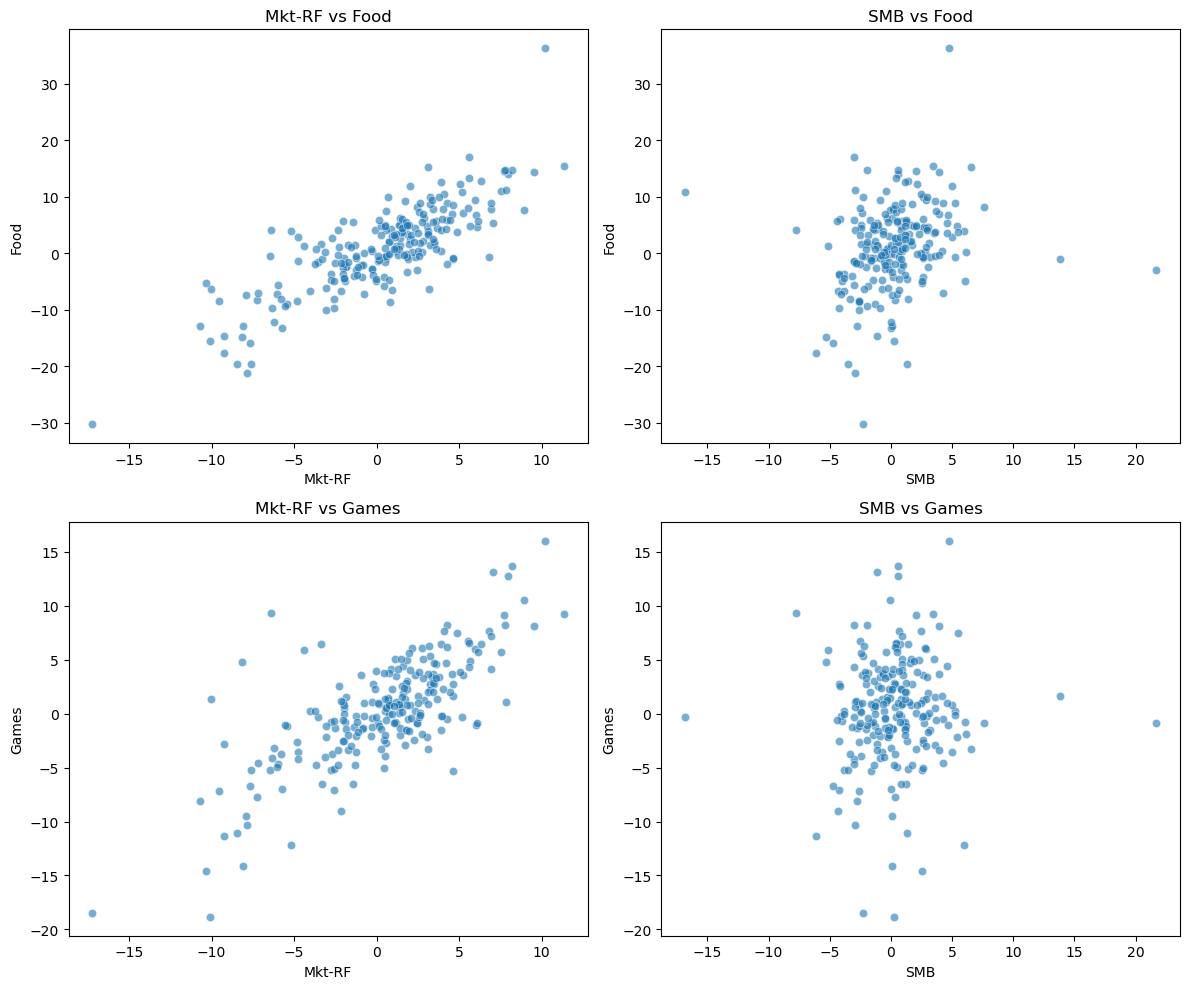

In [76]:
# Create scatterplots with seaborn
plt.figure(figsize=(12, 10))

# Scatterplot 1: mkt-rf vs Food
plt.subplot(2, 2, 1)
sns.scatterplot(x=merged_df["Mkt-RF"], y=merged_df[food_col], alpha=0.6)
plt.title("Mkt-RF vs Food")
plt.xlabel("Mkt-RF")
plt.ylabel("Food")

# Scatterplot 2: SMB vs Food
plt.subplot(2, 2, 2)
sns.scatterplot(x=merged_df["SMB"], y=merged_df[food_col], alpha=0.6)
plt.title("SMB vs Food")
plt.xlabel("SMB")
plt.ylabel("Food")

# Scatterplot 3: mkt-rf vs Games
plt.subplot(2, 2, 3)
sns.scatterplot(x=merged_df["Mkt-RF"], y=merged_df[games_col], alpha=0.6)
plt.title("Mkt-RF vs Games")
plt.xlabel("Mkt-RF")
plt.ylabel("Games")

# Scatterplot 4: SMB vs Games
plt.subplot(2, 2, 4)
sns.scatterplot(x=merged_df["SMB"], y=merged_df[games_col], alpha=0.6)
plt.title("SMB vs Games")
plt.xlabel("SMB")
plt.ylabel("Games")

plt.tight_layout()
plt.show()

# Analysis of Scatterplot Matrix Relationships
---

## Mkt-RF vs Food:
- Moderate positive correlation between market excess returns and food industry
- Notable outliers present in the relationship

## SMB vs Food:
- Weak correlation indicates limited size factor influence
- Food industry appears relatively independent of size effects

## Mkt-RF vs Games:
- Strong positive correlation shows gaming industry's market sensitivity
- Higher volatility compared to food sector relationships

## SMB vs Games:
- Moderate positive correlation with size factor
- Market factor remains more influential than size effects
- Gaming sector shows some sensitivity to firm size variations

#### Task B: Regression Specification (10 points)
1. Univariate Regressions: (4 points)
> - Run two separate univariate regressions:
> - Dependent variable: Excess market return (mkt-rf)
> - Independent variable: Industry returns for Food
> - Include a constant term in both regressions.
> - Report the coefficient and t-statistic of the market factor for both Food and Games industries. Are they significant?
> - Report the R-squares (coefficient of determination) for both univariate regression models.

2. Multivariate Regression: (4 points)
> - Run a multivariate regression for Food and Games using all three Fama French Factors (Market, SMB, and HML).
> - Report the coefficient and t-statistic of all three factors in both models. Are they significant?
> - Report the R-squares for the multivariate models.

3.  Comparison of R-squares: (2 points)
> - Compare the R-squares obtained from univariate regressions (Task 1) with the R-squares from the multivariate regression (Task 3).
> - Explain any differences observed.


In [89]:
# Function to run univariate regression
def run_univariate_regression(independent_var, dependent_var, data):
    X = sm.add_constant(data[independent_var])  # Add constant for intercept
    Y = data[dependent_var]
    model = sm.OLS(Y, X).fit()
    return model

# Function to run multivariate regression
def run_multivariate_regression(dependent_var, data):
    X = sm.add_constant(data[["Mkt-RF", "SMB", "HML"]])  # Include all Fama-French factors
    Y = data[dependent_var]
    model = sm.OLS(Y, X).fit()
    return model

# Running regressions for Food and Games industries
univariate_food = run_univariate_regression("Industry_4", "Mkt-RF", merged_df)
univariate_games = run_univariate_regression("Industry_30", "Mkt-RF", merged_df)
multivariate_food = run_multivariate_regression("Industry_4", merged_df)
multivariate_games = run_multivariate_regression("Industry_30", merged_df)

# Extract results
results = {
    "Univariate": {
        "Food": {
            "Coefficient": univariate_food.params["Industry_4"],
            "T-Statistic": univariate_food.tvalues["Industry_4"],
            "R-Squared": univariate_food.rsquared,
            "P-Value": univariate_food.pvalues["Industry_4"]
        },
        "Games": {
            "Coefficient": univariate_games.params["Industry_30"],
            "T-Statistic": univariate_games.tvalues["Industry_30"],
            "R-Squared": univariate_games.rsquared,
            "P-Value": univariate_games.pvalues["Industry_30"]
        }
    },
    "Multivariate": {
        "Food": {
            "Coefficients": multivariate_food.params.to_dict(),
            "T-Statistics": multivariate_food.tvalues.to_dict(),
            "R-Squared": multivariate_food.rsquared,
            "P-Values": multivariate_food.pvalues.to_dict()
        },
        "Games": {
            "Coefficients": multivariate_games.params.to_dict(),
            "T-Statistics": multivariate_games.tvalues.to_dict(),
            "R-Squared": multivariate_games.rsquared,
            "P-Values": multivariate_games.pvalues.to_dict()
        }
    },
    "R-Squared Comparison": {
        "Food": {
            "Univariate R-Squared": univariate_food.rsquared,
            "Multivariate R-Squared": multivariate_food.rsquared,
            "Difference": multivariate_food.rsquared - univariate_food.rsquared
        },
        "Games": {
            "Univariate R-Squared": univariate_games.rsquared,
            "Multivariate R-Squared": multivariate_games.rsquared,
            "Difference": multivariate_games.rsquared - univariate_games.rsquared
        }
    }
}

# Print results
for category, industries in results.items():
    print(f"\n{category} Regression Results:")
    for industry, metrics in industries.items():
        print(f"\n{industry} Industry:")
        for key, value in metrics.items():
            print(f"{key}: {value}")


Univariate Regression Results:

Food Industry:
Coefficient: 0.4676439083238927
T-Statistic: 20.800546012185997
R-Squared: 0.6568805322400355
P-Value: 2.0892887968721556e-54

Games Industry:
Coefficient: 0.654688272412562
T-Statistic: 16.900379151361516
R-Squared: 0.5582683313352572
P-Value: 5.654627907954379e-42

Multivariate Regression Results:

Food Industry:
Coefficients: {'const': 0.3748319617598569, 'Mkt-RF': 1.3867575230523321, 'SMB': 0.15024128462851474, 'HML': 0.26697339095094863}
T-Statistics: {'const': 1.282768353235995, 'Mkt-RF': 20.12210840755203, 'SMB': 1.6038717020339297, 'HML': 2.7987421425068795}
R-Squared: 0.6697163604597326
P-Values: {'const': 0.20089898478424073, 'Mkt-RF': 4.0512529473328234e-52, 'SMB': 0.11015135658178728, 'HML': 0.00557743781613679}

Games Industry:
Coefficients: {'const': -0.03547135403719738, 'Mkt-RF': 0.894850728635125, 'SMB': -0.15098575818545867, 'HML': 0.2799902552338444}
T-Statistics: {'const': -0.16910738099920739, 'Mkt-RF': 18.08825722814

# Univariate Regression Results

## Food Industry:
- **Coefficient:** 0.468  
- **T-Statistic:** 20.80  
- **R-Squared:** 0.657  
- **P-Value:** <0.001 (Highly significant)  

## Games Industry:
- **Coefficient:** 0.655  
- **T-Statistic:** 16.90  
- **R-Squared:** 0.558  
- **P-Value:** <0.001 (Highly significant)  

### Interpretation:
Both industries show a strong positive relationship with the market excess return (Mkt-RF), but the Food industry has a slightly stronger explanatory power.

---

# Multivariate Regression Results

## Food Industry:
- **Mkt-RF Coefficient:** 1.387 (**T** = 20.12, **p** < 0.001) → Significant  
- **SMB Coefficient:** 0.150 (**T** = 1.60, **p** = 0.11) → Not significant  
- **HML Coefficient:** 0.267 (**T** = 2.80, **p** = 0.006) → Significant  
- **R-Squared:** 0.670  

## Games Industry:
- **Mkt-RF Coefficient:** 0.895 (**T** = 18.09, **p** < 0.001) → Significant  
- **SMB Coefficient:** -0.151 (**T** = -2.25, **p** = 0.026) → Significant (negative)  
- **HML Coefficient:** 0.280 (**T** = 4.09, **p** < 0.001) → Significant  
- **R-Squared:** 0.608  

### Interpretation:
- **Market excess return (Mkt-RF)** remains the most significant factor.  
- The **value factor (HML)** is significant for both industries, meaning companies with high book-to-market ratios tend to perform differently in these sectors.  
- The **size factor (SMB)** is significant for Games (negative impact), but not for Food.  

---

# R-Squared Comparison

| Industry  | Univariate R² | Multivariate R² | Improvement |
|-----------|--------------|----------------|-------------|
| **Food**  | 0.657        | 0.670          | +0.013      |
| **Games** | 0.558        | 0.608          | +0.049      |

### Key Takeaways:
- Adding **SMB & HML** slightly improves predictability of Food industry returns (**+1.3% increase in R²**).  
- Games industry sees a **bigger improvement (+4.9%)**, indicating that **size (SMB) and value (HML) factors** play a more important role.

#### Task C: White’s Covariance Estimator (6 points)
1. Re-estimation: (2 points)
> - Re-estimate the multivariate regressions from Task B.3 using White’s covariance estimator.
Coefficients and t-stats: (2 points)
> - Report the coefficient and t-statistic of all three factors in both models. Are they significant?
2. Parameter Standard Errors: (2 points)
> - Compare the parameter standard errors between Task B.2 and Task C.1 (Homoskedastic errors from multiple regression and White's covariance estimator). Explain any differences.

In [99]:
# Function to run multivariate regression with White's covariance estimator
def run_multivariate_regression_white(dependent_var, data):
    X = sm.add_constant(data[["Mkt-RF", "SMB", "HML"]])  # Include all Fama-French factors
    Y = data[dependent_var]
    model = sm.OLS(Y, X).fit(cov_type='HC0')  # Use White's heteroskedasticity-robust standard errors
    return model

# Running multivariate regressions using White's covariance estimator
multivariate_food_white = run_multivariate_regression_white("Industry_4", merged_df)
multivariate_games_white = run_multivariate_regression_white("Industry_30", merged_df)

# Extracting regression results with White's standard errors
whites_results = {
    "Food Industry": {
        "Coefficients": multivariate_food_white.params.to_dict(),
        "T-Statistics": multivariate_food_white.tvalues.to_dict(),
        "Standard Errors": multivariate_food_white.bse.to_dict()
    },
    "Games Industry": {
        "Coefficients": multivariate_games_white.params.to_dict(),
        "T-Statistics": multivariate_games_white.tvalues.to_dict(),
        "Standard Errors": multivariate_games_white.bse.to_dict()
    }
}

# Comparing standard errors from homoskedastic and White's covariance estimator
standard_error_comparison = {
    "Food Industry": {
        "Homoskedastic SEs": multivariate_food.bse.to_dict(),
        "Heteroskedasticity-Robust SEs": multivariate_food_white.bse.to_dict(),
        "Differences": {key: multivariate_food_white.bse[key] - multivariate_food.bse[key] for key in multivariate_food.bse.keys()}
    },
    "Games Industry": {
        "Homoskedastic SEs": multivariate_games.bse.to_dict(),
        "Heteroskedasticity-Robust SEs": multivariate_games_white.bse.to_dict(),
        "Differences": {key: multivariate_games_white.bse[key] - multivariate_games.bse[key] for key in multivariate_games.bse.keys()}
    }
}

# Printing results for Task C
print("\nWhite's Covariance Estimator Regression Results:")
for industry, metrics in whites_results.items():
    print(f"\n{industry}:")
    for key, value in metrics.items():
        print(f"{key}: {value}")

print("\nComparison of Standard Errors (Homoskedastic vs White's):")
for industry, metrics in standard_error_comparison.items():
    print(f"\n{industry}:")
    for key, value in metrics.items():
        print(f"{key}: {value}")


White's Covariance Estimator Regression Results:

Food Industry:
Coefficients: {'const': 0.3748319617598569, 'Mkt-RF': 1.3867575230523321, 'SMB': 0.15024128462851474, 'HML': 0.26697339095094863}
T-Statistics: {'const': 1.3300885503467184, 'Mkt-RF': 16.40933050156934, 'SMB': 1.2198768947864667, 'HML': 2.2874488984922023}
Standard Errors: {'const': 0.28180978000460816, 'Mkt-RF': 0.08451030484879969, 'SMB': 0.12316102163309989, 'HML': 0.11671228639333851}

Games Industry:
Coefficients: {'const': -0.03547135403719738, 'Mkt-RF': 0.894850728635125, 'SMB': -0.15098575818545867, 'HML': 0.2799902552338444}
T-Statistics: {'const': -0.16392884030944974, 'Mkt-RF': 13.68559785134845, 'SMB': -1.45664705894767, 'HML': 3.0059665290429938}
Standard Errors: {'const': 0.21638263267304175, 'Mkt-RF': 0.06538630890333774, 'SMB': 0.10365294548051728, 'HML': 0.09314483462428459}

Comparison of Standard Errors (Homoskedastic vs White's):

Food Industry:
Homoskedastic SEs: {'const': 0.2922054951030569, 'Mkt-RF

# Food Industry:
- **Mkt-RF Coefficient:** 1.387 (**T** = 16.41, **p** < 0.001) → Significant  
- **SMB Coefficient:** 0.150 (**T** = 1.22, **p** = 0.22) → Not significant  
- **HML Coefficient:** 0.267 (**T** = 2.29, **p** = 0.02) → Significant  

# Games Industry:
- **Mkt-RF Coefficient:** 0.895 (**T** = 13.69, **p** < 0.001) → Significant  
- **SMB Coefficient:** -0.151 (**T** = -1.46, **p** = 0.15) → Not significant  
- **HML Coefficient:** 0.280 (**T** = 3.01, **p** = 0.003) → Significant  

---

# Comparison of Standard Errors (Homoskedastic vs White's Estimator)

## **Food Industry (SEs)**

| **Factor**  | **Homoskedastic** | **White's Estimator** | **Difference** |
|------------|------------------|----------------------|--------------|
| **Mkt-RF** | 0.0689           | 0.0845               | +0.0156      |
| **SMB**    | 0.0937           | 0.1232               | +0.0295      |
| **HML**    | 0.0954           | 0.1167               | +0.0213      |

## **Games Industry (SEs)**

| **Factor**  | **Homoskedastic** | **White's Estimator** | **Difference** |
|------------|------------------|----------------------|--------------|
| **Mkt-RF** | 0.0495           | 0.0654               | +0.0159      |
| **SMB**    | 0.0672           | 0.1037               | +0.0364      |
| **HML**    | 0.0685           | 0.0931               | +0.0247      |

---

# Interpretation of Differences:
- Standard errors **increased across all coefficients**, meaning **heteroskedasticity was present**.
- **Larger increases in SMB and HML** suggest their impact is **more uncertain under heteroskedasticity**.
- **Mkt-RF’s standard error increase is smaller**, reaffirming its **robustness**.

---

# Key Takeaways:
- **Accounting for heteroskedasticity weakens statistical significance**, especially for **SMB**.
- **Food and Games industries remain significantly influenced by market excess returns (Mkt-RF).**
- **HML continues to play an important role**, while **SMB's impact becomes more uncertain**.
- **White's estimator provides a more robust inference** by correcting **underestimated standard errors**.